In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorboard as tb
from scipy.interpolate import interp1d
import seaborn as sns
sns.set_style("dark")

experiment_id = "DxlFeRTKRhyKl3oAQbY1dw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df = df[df["tag"].apply(lambda x : "iter" not  in x)]
df.loc[df["run"].apply(lambda x: "train" in x),"kind_of_training"]="train"
df.loc[df["run"].apply(lambda x: "val" in x),"kind_of_training"]="val"
df["run"] = df["run"].apply(lambda run:run[:run.find("/")])
df.loc[df["run"]=="EfficientNetB2 _unfreezed","step"] += 7
df.loc[df["run"]=="EfficientNetB2 _unfreezed_after_14","step"] += 7


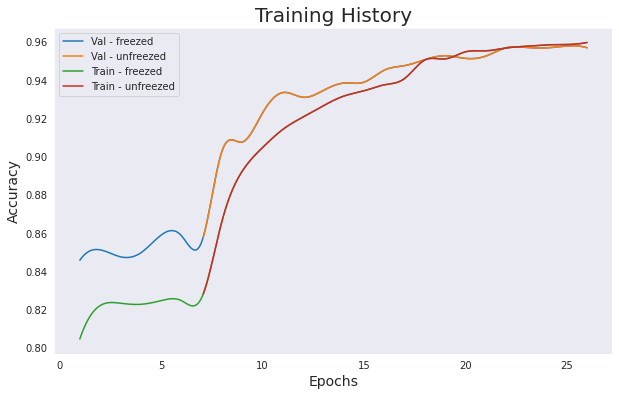

In [12]:
val = []
train = []
for model in df["run"].unique():

    kind = "val"

    val.append(df.loc[(df["run"]==model) * (df["kind_of_training"]==kind) * (df["tag"]=="epoch_accuracy"),["step","value"]].values)

    kind = "train"


    train.append(df.loc[(df["run"]==model) * (df["kind_of_training"]==kind) * (df["tag"]=="epoch_accuracy"),["step","value"]].values)

val = np.concatenate(val,axis=0)
train = np.concatenate(train,axis=0)

def smooth(y):
  x = np.array(range(1,len(y)+1))
  cubic_interploation_model = interp1d(x, y, kind = "cubic")
  x = np.linspace(x.min(), x.max(), 10*len(x))
  y =cubic_interploation_model(x)

  return np.array([ x, y]).T


val = smooth(val[:,1])
train = smooth(train[:,1])

plt.figure(figsize=(10,6))
plt.plot(val[:,0],val[:,1],label="Val - freezed")
plt.plot(val[63:,0],val[63:,1],label="Val - unfreezed")
plt.plot(train[:,0],train[:,1],label="Train - freezed")
plt.plot(train[63:,0],train[63:,1],label="Train - unfreezed")
plt.legend()
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.title("Training History",fontsize = 20)
plt.savefig("../Imgs/training_history.jpg")
plt.show()
